In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
import scipy.stats as stat
import scipy as sp
import statistics

import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import seaborn as sns

#import warnings
#warnings.filterwarnings('ignore')

# Modèle de ML
from sklearn import linear_model

# data pre-processing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Outils score et evaluation de modèle
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import r2_score

# Outils optmisation de modèle
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

C:\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


In [6]:
df = pd.read_csv("donnees_modiffiees4.csv")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23220 entries, 0 to 23219
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   MandatId                      23220 non-null  int64 
 1   SurfaceMin                    23220 non-null  int64 
 2   NombrePiecesEnum              23220 non-null  int64 
 3   NombreChambresEnum            23220 non-null  int64 
 4   StatutProspectMandatClientID  23220 non-null  int64 
 5   TypeMission                   23220 non-null  int64 
 6   TypeBien                      23220 non-null  int64 
 7   TypeProjet                    23220 non-null  int64 
 8   BudgetMaxEuro                 23220 non-null  int64 
 9   CodePostal                    23220 non-null  int64 
 10  Ville                         23220 non-null  object
 11  Departement                   23220 non-null  object
 12  dpt                           23220 non-null  int64 
 13  Region          

In [9]:
df["StatutProspectMandatClientID"].value_counts()

9    15181
8     7177
7      862
Name: StatutProspectMandatClientID, dtype: int64

In [11]:
conditionlist = [
    (df['StatutProspectMandatClientID'] == 9),
    (df['StatutProspectMandatClientID'] == 7),
    (df['StatutProspectMandatClientID'] == 8)]

choicelist = ['0','1','1']
df['Succes'] = np.select(conditionlist, choicelist, default='Not Specified')
print(df["Succes"].value_counts())

0    15181
1     8039
Name: Succes, dtype: int64


In [13]:
df.head()

,MandatId,SurfaceMin,NombrePiecesEnum,NombreChambresEnum,StatutProspectMandatClientID,TypeMission,TypeBien,TypeProjet,BudgetMaxEuro,CodePostal,Ville,Departement,dpt,Region,Succes
0,17,130,5,4,9,1,1,1,400000,34970,Lattes,Hérault,34,Languedoc-Roussillon,0
1,78,90,4,3,8,1,1,1,500000,34000,Montpellier,Hérault,34,Languedoc-Roussillon,1
2,79,50,3,2,9,1,1,1,240000,78300,Poissy,Yvelines,78,Île-de-France,0
3,81,90,3,2,9,1,1,1,300000,34000,Montpellier,Hérault,34,Languedoc-Roussillon,0
4,95,60,3,2,9,1,1,1,330000,33000,Bordeaux,Gironde,33,Aquitaine,0


In [12]:
df.describe()

,MandatId,SurfaceMin,NombrePiecesEnum,NombreChambresEnum,StatutProspectMandatClientID,TypeMission,TypeBien,TypeProjet,BudgetMaxEuro,CodePostal,dpt
count,23220.000000,23220.000000,23220.000000,23220.000000,23220.000000,23220.000000,23220.000000,23220.000000,2.322000e+04,23220.000000,23220.000000
mean,61536.549785,81.305685,3.314686,2.228467,8.616667,1.951766,2.190224,1.066667,4.443156e+05,60171.830879,59.925883
std,21457.545370,75.856491,1.261795,1.176397,0.557359,0.392881,1.765810,0.249449,3.621590e+05,25801.825766,25.832861
min,17.000000,9.000000,0.000000,0.000000,7.000000,0.000000,0.000000,1.000000,2.300000e+02,1000.000000,1.000000
25%,47781.000000,50.000000,2.000000,1.000000,8.000000,2.000000,1.000000,1.000000,2.430000e+05,34970.000000,34.000000
50%,67604.000000,70.000000,3.000000,2.000000,9.000000,2.000000,2.000000,1.000000,3.500000e+05,69270.000000,69.000000
75%,79389.000000,100.000000,4.000000,3.000000,9.000000,2.000000,2.000000,1.000000,5.300000e+05,75017.000000,75.000000
max,88980.000000,2500.000000,6.000000,6.000000,9.000000,6.000000,8.000000,2.000000,1.000000e+07,95880.000000,95.000000


In [15]:
X = df.drop(["MandatId","StatutProspectMandatClientID", "Departement", "Ville", "Region", "Succes"], axis = 1)
y = df["Succes"]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

LGBMClassifier()

In [19]:
y_clf = clf.predict(X_test)

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_clf,target_names = ['Echec(Class 0)','Succès (Class 1)']))

                  precision    recall  f1-score   support

  Echec(Class 0)       0.76      0.94      0.84      3754
Succès (Class 1)       0.81      0.47      0.59      2051

        accuracy                           0.77      5805
       macro avg       0.79      0.70      0.72      5805
    weighted avg       0.78      0.77      0.75      5805



<AxesSubplot:>

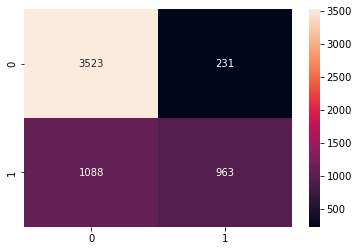

In [21]:
cm = confusion_matrix(y_test,clf.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

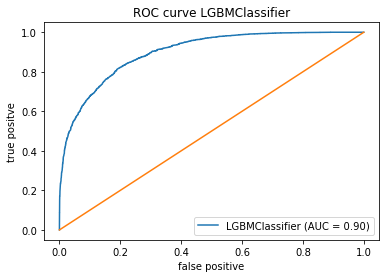

In [22]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf, X_train,y_train )
plt.plot([0,1],[0,1])
plt.xlabel('false positive')
plt.ylabel('true positve')
plt.title('ROC curve LGBMClassifier')
plt.show()

In [23]:
from xgboost import XGBClassifier
xgb = XGBClassifier(objective='binary:logistic')
xgb.fit(X_train, y_train,eval_metric = "logloss",verbose=True)

C:\Users\Lou Doussiet\AppData\Roaming\Python\Python38\site-packages\xgboost\compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [24]:
y_xgb = xgb.predict(X_test)

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_xgb,target_names = ['Echec(Class 0)','Succès (Class 1)']))

                  precision    recall  f1-score   support

  Echec(Class 0)       0.81      0.91      0.86      3754
Succès (Class 1)       0.79      0.60      0.68      2051

        accuracy                           0.80      5805
       macro avg       0.80      0.76      0.77      5805
    weighted avg       0.80      0.80      0.80      5805



<AxesSubplot:>

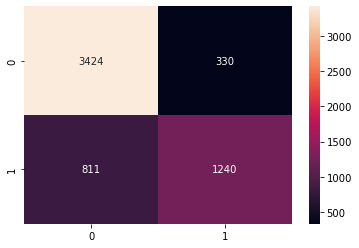

In [26]:
cm = confusion_matrix(y_test,xgb.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

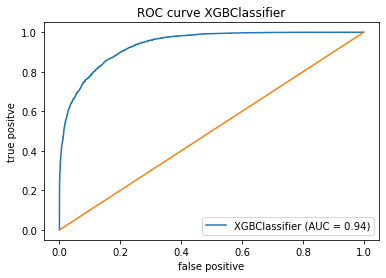

In [27]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(xgb, X_train,y_train )
plt.plot([0,1],[0,1])
plt.xlabel('false positive')
plt.ylabel('true positve')
plt.title('ROC curve XGBClassifier')
plt.show()

In [28]:
!pip install lazypredict

  Using cached numpy-1.19.1-cp38-cp38-win_amd64.whl (13.0 MB)
  Using cached pandas-1.0.5-cp38-cp38-win_amd64.whl (8.9 MB)
  Using cached scikit_learn-0.23.1-cp38-cp38-win_amd64.whl (6.8 MB)
  Using cached joblib-1.0.0-py3-none-any.whl (302 kB)
  Using cached lightgbm-2.3.1-py2.py3-none-win_amd64.whl (544 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5


ERROR: Could not install packages due to an OSError: [WinError 5] Accès refusé: 'C:\\Users\\Lou Doussiet\\AppData\\Local\\Temp\\pip-uninstall-nff8ins7\\core\\_multiarray_tests.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [29]:
import lazypredict